<a href="https://colab.research.google.com/github/aishani1903/PUBG_EDA-hackathon/blob/main/PUBG_EDA(hackathon).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load all libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

Load data

In [ ]:
df = pd.read_csv("data.csv")
df.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,84,1437,0,0,0.000,1403,squad-fpp,31,29,-1,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,57,1225,0,0,0.000,1971,squad-fpp,30,30,-1,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,50,0,0,0,0.000,1741,solo-fpp,96,89,1516,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,56,1286,0,0,0.000,1738,squad-fpp,28,27,-1,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,31,0,1,1,7.737,2193,solo,99,95,1482,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [ ]:
df.shape

(1111742, 30)

we'll reduce the momory usage as our dataset is very large....
code credits = kaggle

In [ ]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                #if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                #    df[col] = df[col].astype(np.float16)
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        #else:
         #   df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [ ]:
reduce_mem_usage(df)
df.head()

Memory usage of dataframe is 254.46 MB
Memory usage after optimization is: 89.06 MB
Decreased by 65.0%


,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.930000,0,0,0,84,1437,0,0,0.000,1403,squad-fpp,31,29,-1,0,0.000000,0,0.0,0,0,151.300003,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.709999,0,0,0,57,1225,0,0,0.000,1971,squad-fpp,30,30,-1,0,0.000000,0,0.0,0,0,1918.000000,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.730000,0,0,0,50,0,0,0,0.000,1741,solo-fpp,96,89,1516,0,4088.000000,0,0.0,0,0,820.000000,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.000000,0,0,0,56,1286,0,0,0.000,1738,squad-fpp,28,27,-1,1,0.000000,0,0.0,0,0,38.810001,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.000000,0,0,3,31,0,1,1,7.737,2193,solo,99,95,1482,0,918.400024,0,0.0,0,0,1721.000000,5,0,0.6429


In [ ]:
df.keys()

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

We are dropping the unnamed column as it isnt giving us any insights about the data

In [ ]:
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.930000,0,0,0,84,1437,0,0,0.000,1403,squad-fpp,31,29,-1,0,0.000000,0,0.0,0,0,151.300003,1,1525,0.0667
1,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.709999,0,0,0,57,1225,0,0,0.000,1971,squad-fpp,30,30,-1,0,0.000000,0,0.0,0,0,1918.000000,7,1516,0.5862
2,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.730000,0,0,0,50,0,0,0,0.000,1741,solo-fpp,96,89,1516,0,4088.000000,0,0.0,0,0,820.000000,7,0,0.8105
3,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.000000,0,0,0,56,1286,0,0,0.000,1738,squad-fpp,28,27,-1,1,0.000000,0,0.0,0,0,38.810001,0,1515,0.5556
4,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.000000,0,0,3,31,0,1,1,7.737,2193,solo,99,95,1482,0,918.400024,0,0.0,0,0,1721.000000,5,0,0.6429


We check the null values if any

In [ ]:
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

There is only one null value so we'll view it

In [ ]:
df[df['winPlacePerc'].isnull() == True]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
184895,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,0,0,0,0.0,9,solo-fpp,1,1,1574,0,0.0,0,0.0,0,0,0.0,0,0,NaN


We will find the correlation in the columns

In [ ]:
z = df.corr()

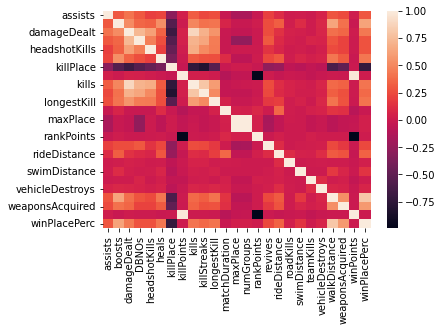

In [ ]:
sns.heatmap(z)

In [ ]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 29 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Id               1111742 non-null  object 
 1   groupId          1111742 non-null  object 
 2   matchId          1111742 non-null  object 
 3   assists          1111742 non-null  int8   
 4   boosts           1111742 non-null  int8   
 5   damageDealt      1111742 non-null  float32
 6   DBNOs            1111742 non-null  int8   
 7   headshotKills    1111742 non-null  int8   
 8   heals            1111742 non-null  int8   
 9   killPlace        1111742 non-null  int8   
 10  killPoints       1111742 non-null  int16  
 11  kills            1111742 non-null  int8   
 12  killStreaks      1111742 non-null  int8   
 13  longestKill      1111742 non-null  float32
 14  matchDuration    1111742 non-null  int16  
 15  matchType        1111742 non-null  object 
 16  maxPlace         1

Now we will see if there are any outliers in the data

In [ ]:
def detect_outliers(df):
    cols = list(df)
    outliers = pd.DataFrame(columns = ['Feature', 'Number of Outliers'])
    for column in cols:
        if column in df.select_dtypes(include=np.number).columns:
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column, 'Number of Outliers':df.loc[(df[column] < fence_low) | (df[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(df)

,Feature,Number of Outliers
0,assists,194611
1,boosts,35533
2,damageDealt,54026
3,DBNOs,73607
4,headshotKills,187930
5,heals,81625
6,killPlace,0
7,killPoints,0
8,kills,129163
9,killStreaks,13391


Summary for the number of kills

In [ ]:
print('The average person kills {:.4f} players'.format(df['kills'].mean()))
print('50% of people have ',df['kills'].quantile(0.50),' kills or less')
print('75% of people have ',df['kills'].quantile(0.75),' kills or less')
print('99% of people have ',df['kills'].quantile(0.99),' kills or less')
print('while the most kills recorded in the data is', df['kills'].max())


The average person kills 0.9255 players
50% of people have  0.0  kills or less
75% of people have  1.0  kills or less
99% of people have  7.0  kills or less
while the most kills recorded in the data is 72


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



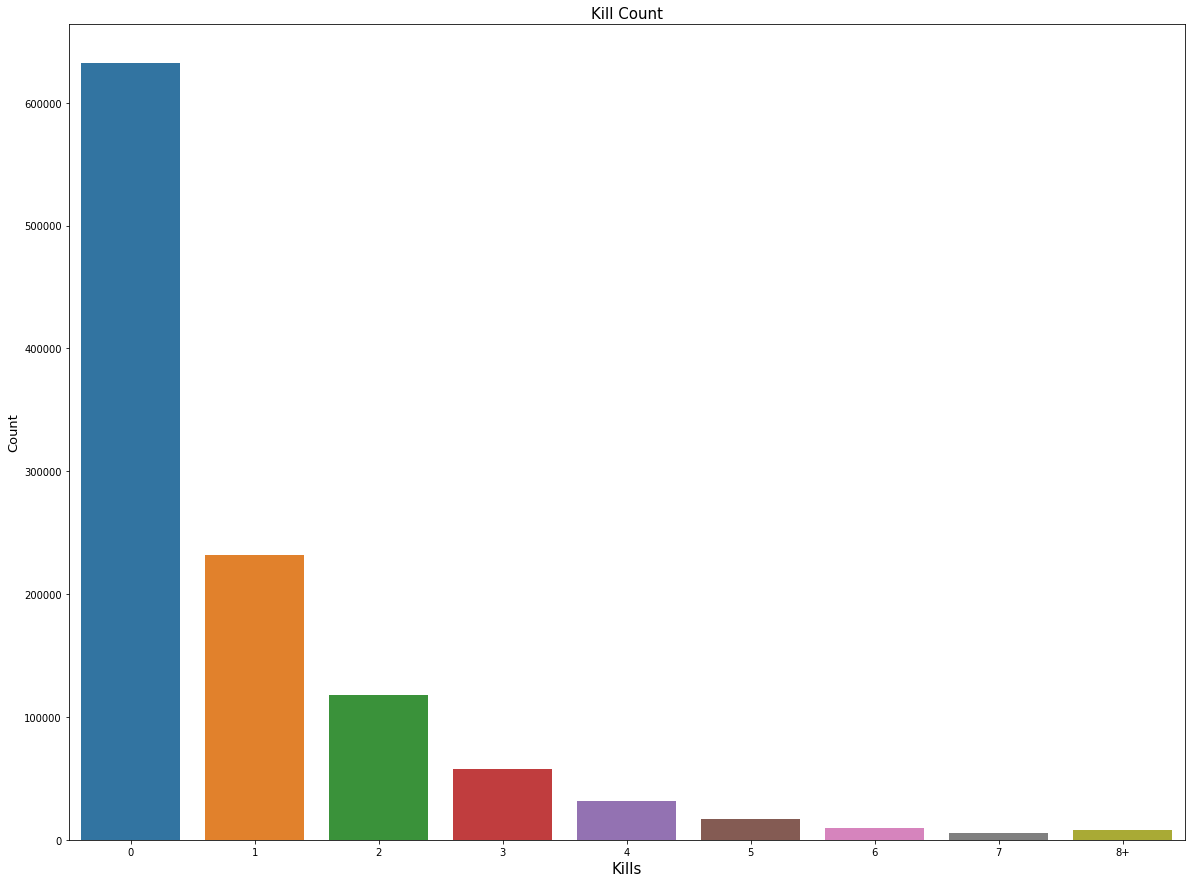

In [ ]:
import seaborn as sns
data = df.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(20,15))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title('Kill Count',fontsize=15)
plt.xlabel('Kills', fontsize=15)
plt.ylabel('Count',fontsize=13)
plt.show()

Summary statistics for the number of kills

In [ ]:
print('The average person kills {:.4f} players in a short time'.format(df['killStreaks'].mean()))
print('50% of people have ',df['killStreaks'].quantile(0.50),' kills or less in a short time')
print('75% of people have ',df['killStreaks'].quantile(0.75),' kills or less in a short time')
print('99% of people have ',df['killStreaks'].quantile(0.99),' kills or less in a short time')
print('While the most kills in a row recorded in the data is', df['killStreaks'].max())

The average person kills 0.5449 players in a short time
50% of people have  0.0  kills or less in a short time
75% of people have  1.0  kills or less in a short time
99% of people have  3.0  kills or less in a short time
While the most kills in a row recorded in the data is 20


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



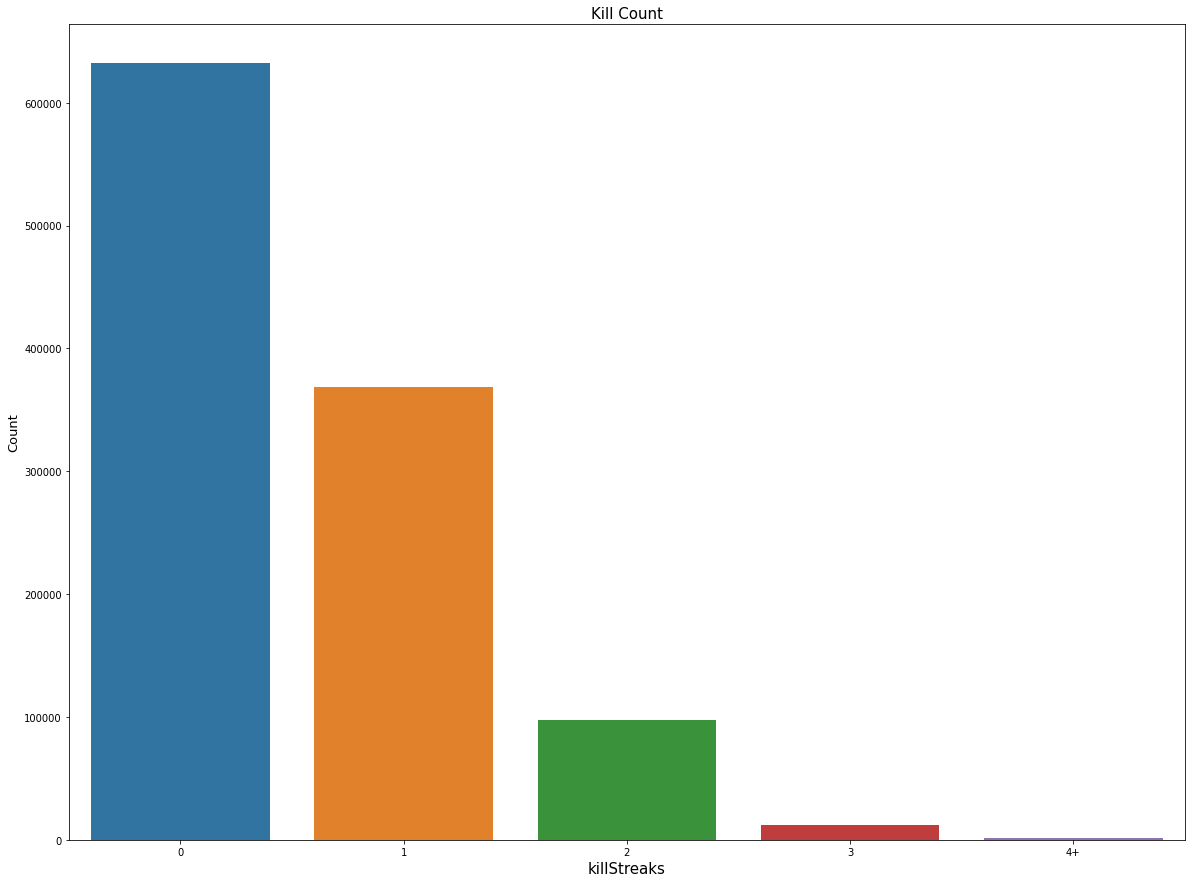

In [ ]:
data = df.copy()
data.loc[data['killStreaks'] > data['killStreaks'].quantile(0.99)] = '4+'
plt.figure(figsize=(20,15))
sns.countplot(data['killStreaks'].astype('str').sort_values())
plt.title('Kill Count',fontsize=15)
plt.xlabel('killStreaks', fontsize=15)
plt.ylabel('Count',fontsize=13)
plt.show()

In [ ]:
df['matchType'].value_counts()

squad-fpp           438781
duo-fpp             249927
squad               156573
solo-fpp            133854
duo                  78039
solo                 45679
normal-squad-fpp      4286
crashfpp              1581
normal-duo-fpp        1400
flaretpp               633
normal-solo-fpp        465
flarefpp               180
normal-squad           135
crashtpp                86
normal-solo             75
normal-duo              48
Name: matchType, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



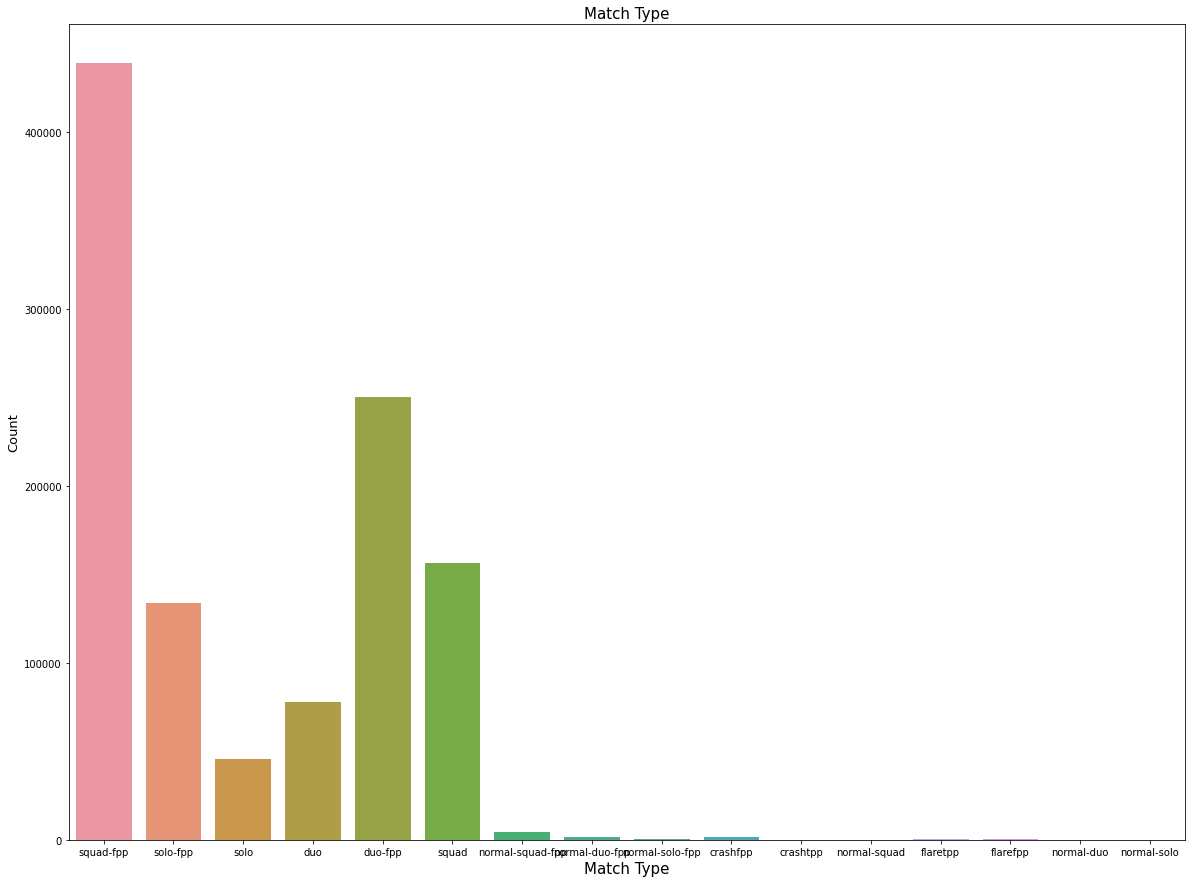

In [ ]:
plt.figure(figsize=(20,15))
sns.countplot(df['matchType'], )
plt.title('Match Type',fontsize=15)
plt.xlabel('Match Type', fontsize=15)
plt.ylabel('Count',fontsize=13)
plt.show()

Most played matchtype is squad-fpp

The least played matchtype is normal-duo

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



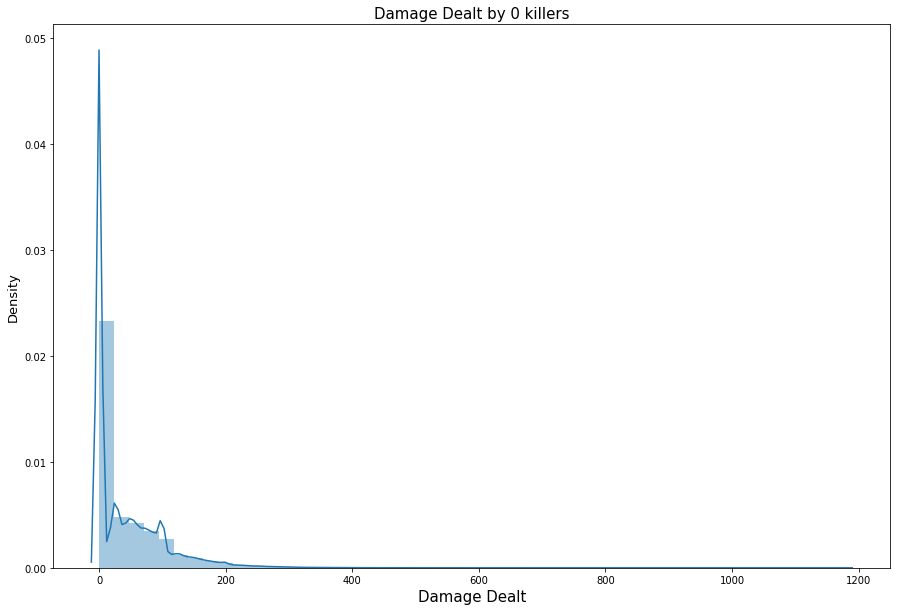

In [ ]:
data = df.copy()

# Keep only those players that didn't kill anyone
data = data[data['kills']==0]
plt.figure(figsize=(15,10))
plt.title('Damage Dealt by 0 killers',fontsize=15)
sns.distplot(data['damageDealt'])
plt.xlabel('Damage Dealt', fontsize=15)
plt.ylabel('Density',fontsize=13)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



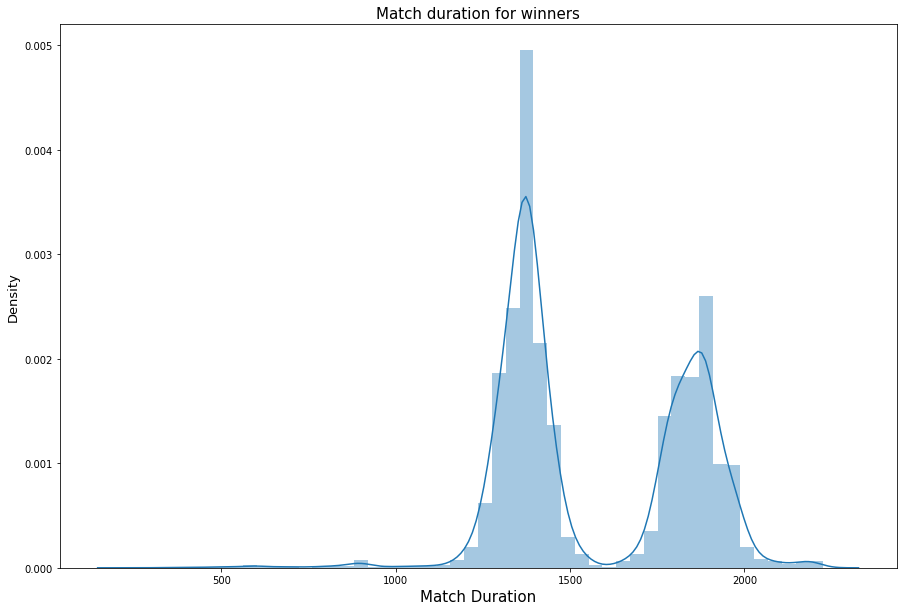

In [ ]:
# Keep only the players that won the match
data = df[df['winPlacePerc'] == 1]

plt.figure(figsize=(15,10))
plt.title('Match duration for winners',fontsize=15)
sns.distplot(data['matchDuration'])
plt.xlabel('Match Duration', fontsize=15)
plt.ylabel('Density',fontsize=13)
plt.show()

It appears that the match duration has no bearing on the winPlacePerc. Apparently you can even win the game in just over 2 min, but more commonly the game is won in approximately 1400 or 1850 seconds. The match Duration is not a feature that is likely to be useful in predicting the winPlacePer.

Bivariate Analysis

<Figure size 1080x720 with 0 Axes>

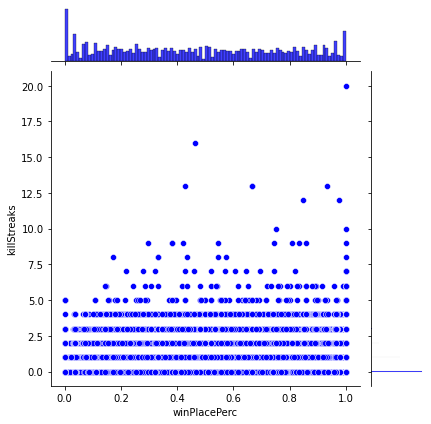

In [ ]:
plt.figure(figsize=(15,10))
sns.jointplot(x='winPlacePerc', y='killStreaks', data=df, color='b')
# plt.title('Win place vs Kill Streaks')
plt.xlabel('Win Place Prec', fontsize=15)
plt.ylabel('Kill streaks',fontsize=13)
plt.show()

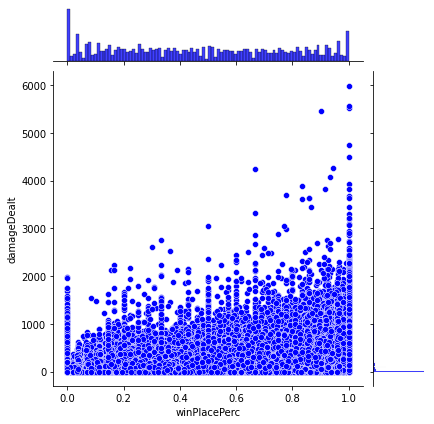

In [ ]:
sns.jointplot(x='winPlacePerc', y='damageDealt', data=df, color='b')

In [ ]:
print('The average person kills {:.4f} players on their own team'.format(df['teamKills'].mean()))
print('50% of people have killed ',df['teamKills'].quantile(0.50),' team players')
print('75% of people have killed ',df['teamKills'].quantile(0.75),' team players')
print('99% of people have killed ',df['teamKills'].quantile(0.99),' team players')
print('while the most kills recorded in the data is', df['teamKills'].max())

The average person kills 0.0240 players on their own team
50% of people have killed  0.0  team players
75% of people have killed  0.0  team players
99% of people have killed  1.0  team players
while the most kills recorded in the data is 10


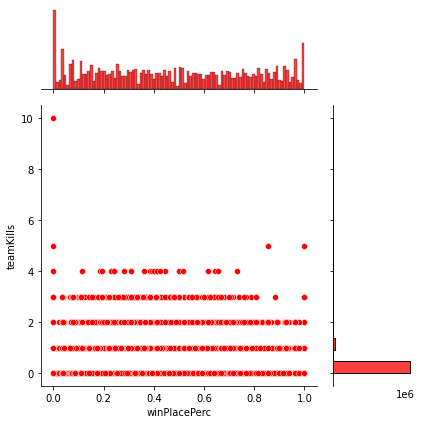

In [ ]:
sns.jointplot(x='winPlacePerc', y='teamKills', data=df, ratio=3, color='r')

In [ ]:
# Create a new feature for total distance travelled
data = df[['winPlacePerc']].copy()
data['totalDistance'] = df['walkDistance'] + df['rideDistance'] + df['swimDistance']

# Summary statistics for the total distance travelled
print('The average person travelled {:.2f} m'.format(data['totalDistance'].mean()))
print('25% of people have travelled {:.2f} m or less'.format(data['totalDistance'].quantile(0.25)))
print('50% of people have travelled {:.2f} m or less'.format(data['totalDistance'].quantile(0.50)))
print('75% of people have travelled {:.2f} m or less'.format(data['totalDistance'].quantile(0.75)))
print('99% of people have travelled {:.2f} m or less'.format(data['totalDistance'].quantile(0.99)))
print('The longest distance travelled in the data is {:.2f} m'.format(data['totalDistance'].max()))

The average person travelled 1761.24 m
25% of people have travelled 158.30 m or less
50% of people have travelled 785.40 m or less
75% of people have travelled 2724.00 m or less
99% of people have travelled 9302.00 m or less
The longest distance travelled in the data is 37312.00 m


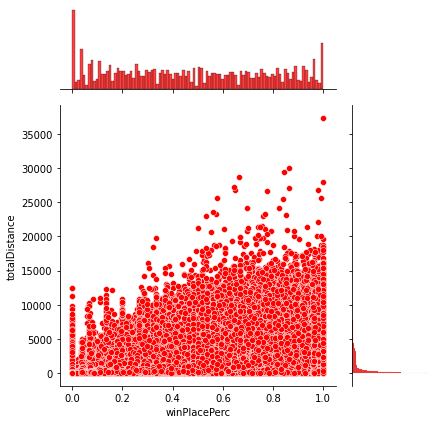

In [ ]:
sns.jointplot(x='winPlacePerc', y='totalDistance', data=data, ratio=3, color='r')

Total distance travelled  
This is not an existing feature in the data, but we can combine the distance features to forma a total distance measure, so see if this has any predictive power of our target variable.

In [ ]:
# Summary statistics for the number of healing items used
print('The average person uses {:.2f} healing items'.format(df['heals'].mean()))
print('50% of people used {:.2f} healing items'.format(df['heals'].quantile(0.50)))
print('75% of people used {:.2f} healing items or less'.format(df['heals'].quantile(0.75)))
print('99% of people used {:.2f} healing items or less'.format(df['heals'].quantile(0.99)))
print('The doctor of the data used {:.2f} healing items'.format(df['heals'].max()))

The average person uses 1.37 healing items
50% of people used 0.00 healing items
75% of people used 2.00 healing items or less
99% of people used 12.00 healing items or less
The doctor of the data used 73.00 healing items


In [ ]:
# Summary statistics for the number of boosting items used
print('The average person uses {:.2f} boosting items'.format(df['boosts'].mean()))
print('50% of people used {:.2f} boosting items'.format(df['boosts'].quantile(0.50)))
print('75% of people used {:.2f} boosting items or less'.format(df['boosts'].quantile(0.75)))
print('99% of people used {:.2f} boosting items or less'.format(df['boosts'].quantile(0.99)))
print('The addict of the data used {:.2f} boosting items'.format(df['boosts'].max()))

The average person uses 1.11 boosting items
50% of people used 0.00 boosting items
75% of people used 2.00 boosting items or less
99% of people used 7.00 boosting items or less
The addict of the data used 24.00 boosting items


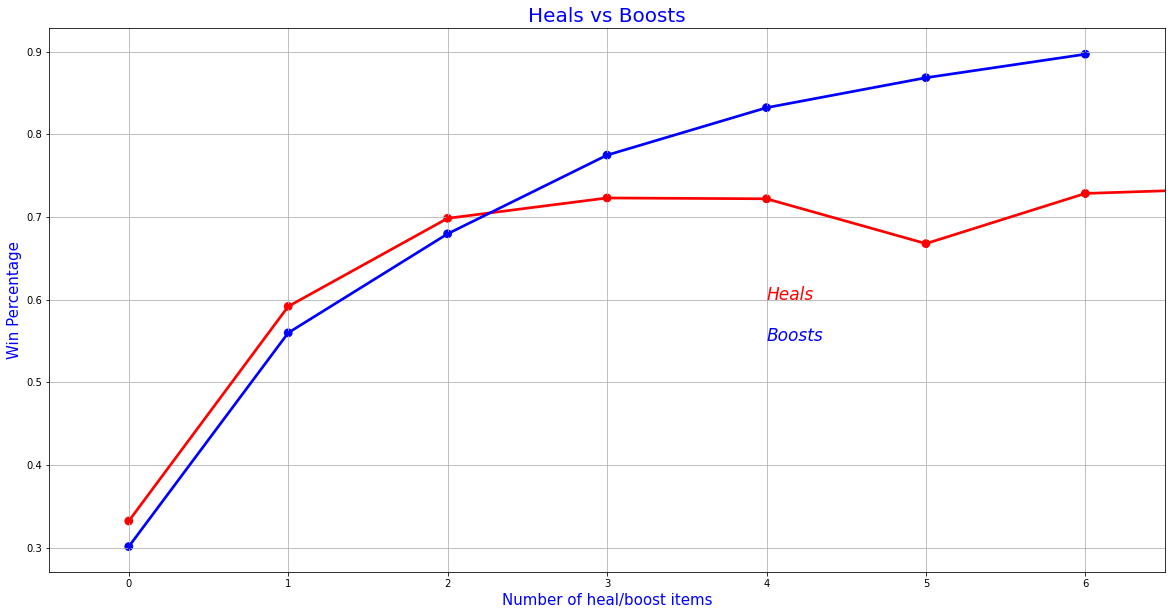

In [ ]:
data = df.copy()
data = data[data['heals'] < data['heals'].quantile(0.99)]
data = data[data['boosts'] < data['boosts'].quantile(0.99)]

f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='red',alpha=1.0)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='blue',alpha=0.8)
plt.text(4,0.6,'Heals',color='red',fontsize = 17,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 17,style = 'italic')
plt.xlabel('Number of heal/boost items',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Heals vs Boosts',fontsize = 20,color='blue')
plt.grid()


Here we can see how the heal items and boost items ae used compared to each other.
This seems to indicate that using a few healing items increases your chance of winning, but you need to use more boosts to actaully achieve a change of winning.

Multivariate Analysis

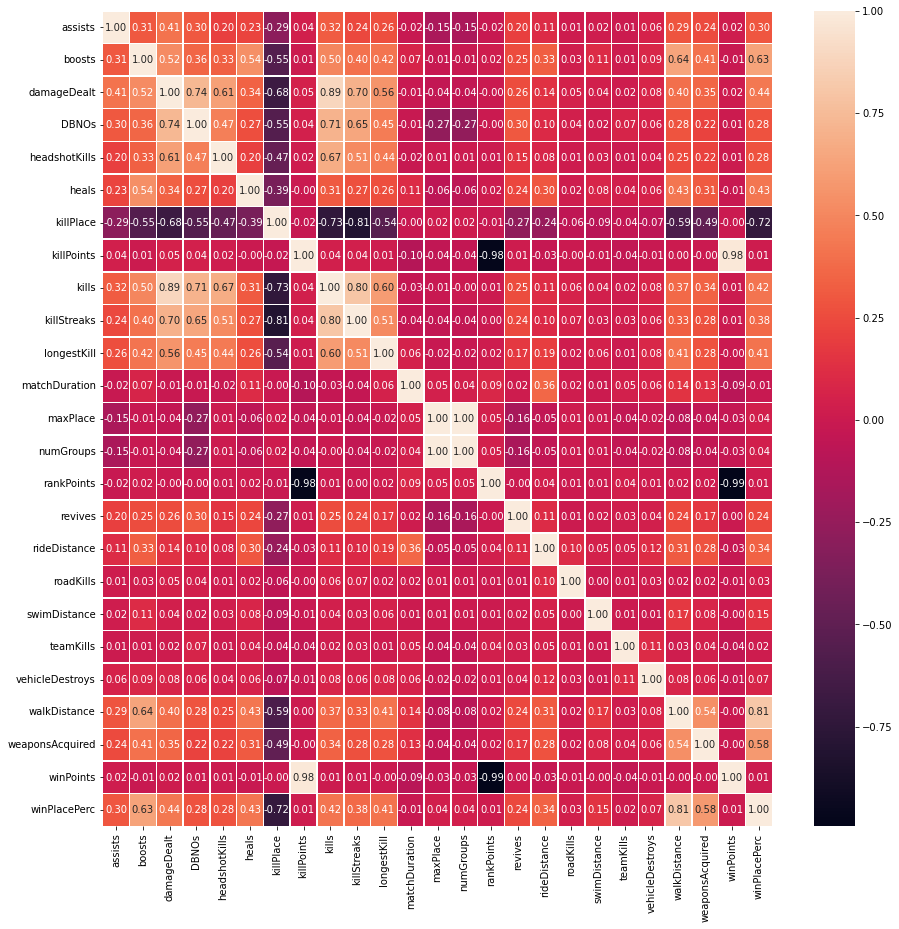

In [ ]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)

Observations:
According to the colorbar we can find the correlation between different features.
If correlation is positive, one variable increases with other.
If correlation is negative, as one variable increases, the other decreases.
if correlation is 1, it means that either the variables are same or they are almost same